LendingClub is an American lending company from San Francisco, that acts as a broker to match investors with would-be borrowers. Lending Club provides the "bridge" between investors and borrowers.

My hypothesis is based on the assumption that there are common signs indicating the probability of default, which can be used to take measures such as denial of credit, reduction of the loan amount, lending (risky applicants) at a higher interest rate, etcAnd with the help of these signs, you can create a model that would predict the future of the loan at the stage of approving the application to the borrower.
And with the help of these signs, you can create a model that would predict the future of the loan at the stage of approving the application to the borrower.

The first task to achieve the goal is Business Understanding and Data Understanding. It is necessary to prepare and clear the data. And then building a model that could predict the fate of the loan, namely whether it will be fully paid or not.

The data file Lending_club contains the loan and borrower information for loans initiated from 2007 to 2011 in six states, California, New York, Florida, Texas, New Jersey and Illinois. The data dictionary file Data_dictionary contains descriptions of all the columns in the data file

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_df = pd.read_csv('lending_club_2007_2011_6_states.csv')
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


 1.Business Understanding and Data Understanding

In [7]:
dc=pd.read_csv('data_dictionary.csv')
#descriptions of all the columns in the data file

In [8]:
dc

,ColumnName,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,addr_state,The state provided by the borrower in the loan...
2,annual_inc,The self-reported annual income provided by th...
3,application_type,Indicates whether the loan is an individual ap...
4,chargeoff_within_12_mths,Number of charge-offs within 12 months
5,collection_recovery_fee,post charge off collection fee
6,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
7,debt_settlement_flag,"Flags whether or not the borrower, who has cha..."
8,debt_settlement_flag_date,The most recent date that the Debt_Settlement_...
9,delinq_2yrs,The number of 30+ days past-due incidences of ...


In [9]:
loan_df.shape
# Dataset have 58 columns about 20.000 loans.

(19908, 58)

In [10]:
loan_df.addr_state.unique()
#info about louans in the 6 states

array(['IL', 'CA', 'TX', 'FL', 'NY', 'NJ'], dtype=object)

In [11]:
loan_df.term.unique()
#There are two different terms, 36 months and 60 months.

array(['36 months', '60 months'], dtype=object)

In [12]:
loan_df.term.value_counts()
#There are about three times more 36 months loans than 60 months loans in the dataset.

36 months    14852
60 months     5056
Name: term, dtype: int64

<AxesSubplot:>

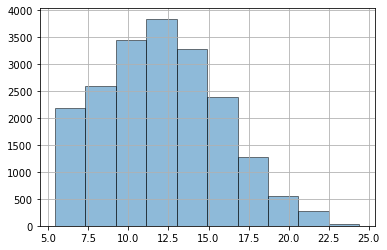

In [13]:
loan_df.int_rate.hist(edgecolor='black', alpha=0.5)
#Interest rate is in the range from 5% to 25%. Majority of loans have interest rate between 5-17%.

In [14]:
loan_df.groupby('term').agg({'int_rate':'mean'})
#36 months loans have significant lower average interest rate than that of 60 months loans.

,int_rate
term,
36 months,11.121125
60 months,14.934955


Text(0, 0.5, 'Loan Term')

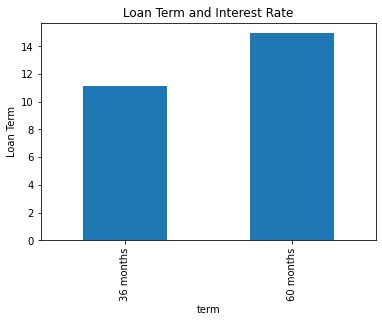

In [15]:
ax = loan_df.groupby('term').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Loan Term and Interest Rate')
ax.set_ylabel('Loan Term')
#36 months loans have significant lower average interest rate than that of 60 months loans.

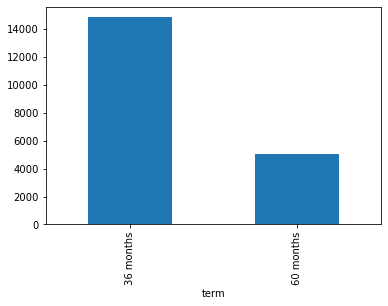

In [17]:
ax1 = loan_df.groupby('term').agg({'loan_amnt':'count'}).plot.bar(legend = False)

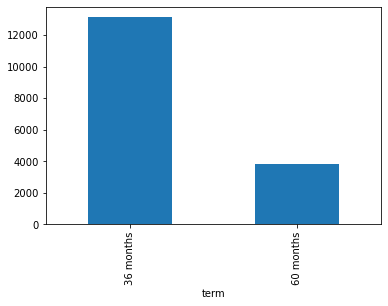

In [18]:
ax2 = loan_df[loan_df['loan_status']=='Fully Paid'].groupby('term').agg({'loan_amnt':'count'}).plot.bar(legend = False)
#there is no particular difference between the loan term and the full repayment of the loan

==> Preferably and more often borrowers were lent for a period of 36 months. But at the same time , there is no dependence on whether loans with a term of 36 months or 60 months were repaid more often.

In [19]:
loan_df.grade.unique()

array(['C', 'E', 'F', 'B', 'A', 'D', 'G'], dtype=object)

In [20]:
loan_df.groupby('grade').agg({'int_rate':'mean'})

,int_rate
grade,
A,7.350978
B,11.033439
C,13.555241
D,15.707576
E,17.653752
F,19.729463
G,21.346981


==> There are 7 credit ratings in the dataset. The rate increases depending on the credit rating.

Text(0, 0.5, 'Interest Rate')

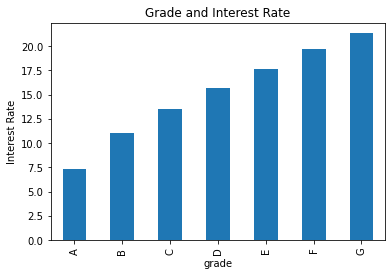

In [21]:
ax3 = loan_df.groupby('grade').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax3.set_title('Grade and Interest Rate')
ax3.set_ylabel('Interest Rate')
#There are 7 credit ratings in the dataset. The rate increases depending on the credit rating.

In [22]:
loan_df.groupby('grade').agg({'loan_amnt':'count'})

,loan_amnt
grade,
A,4875
B,6065
C,4087
D,2748
E,1434
F,540
G,159


In [23]:
loan_df.groupby('grade').agg({'loan_amnt':'mean'})

,loan_amnt
grade,
A,8817.800000
B,11221.603462
C,10985.900416
D,12396.379185
E,15988.249651
F,18105.277778
G,20867.610063


Text(0, 0.5, 'Loan_amnt')

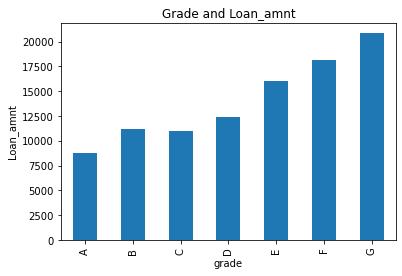

In [24]:
ax4 = loan_df.groupby('grade').agg({'loan_amnt':'mean'}).plot.bar(legend = False)
ax4.set_title('Grade and Loan_amnt')
ax4.set_ylabel('Loan_amnt')
#the highest loan amounts are in grade E,F,G

==> The first three grade include a larger number of credits. But what is the reason for this. Whether the credit institution refused borrowers with a certain grade. Or are the borrowers themselves not ready to lend at a higher interest rate.
The rate increases depending on the grade. The lower loan amount corresponds to Group A, the largest amount G

Text(0, 0.5, 'Count of Loan')

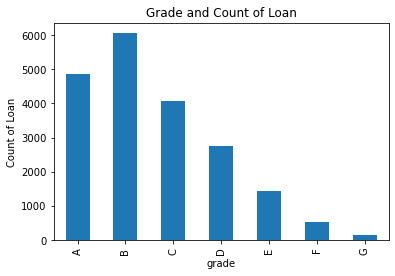

In [54]:
ax7 = loan_df.groupby('grade').agg({'loan_amnt':'count'}).plot.bar(legend = False)
ax7.set_title('Grade and Count of Loan')
ax7.set_ylabel('Count of Loan')

Text(0, 0.5, 'Count of Loan')

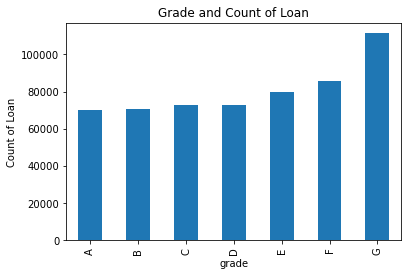

In [58]:
ax8 = loan_df[loan_df['loan_status']=='Fully Paid'].groupby('grade').agg({'annual_inc':'mean'}).plot.bar(legend = False)
ax8.set_title('Grade and Count of Loan')
ax8.set_ylabel('Count of Loan')

Text(0, 0.5, 'Count of Loan')

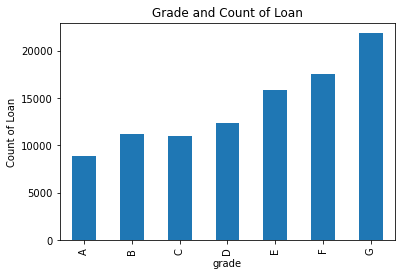

In [59]:
ax8 = loan_df[loan_df['loan_status']=='Fully Paid'].groupby('grade').agg({'loan_amnt':'mean'}).plot.bar(legend = False)
ax8.set_title('Grade and Count of Loan')
ax8.set_ylabel('Count of Loan')

Text(0, 0.5, 'Count of Loan')

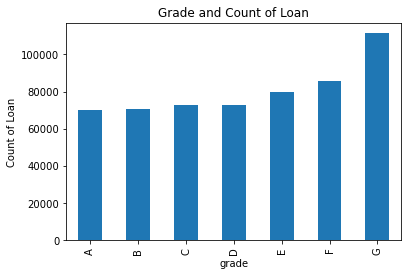

In [57]:
ax8 = loan_df[loan_df['loan_status']=='Fully Paid'].groupby('grade').agg({'annual_inc':'mean'}).plot.bar(legend = False)
ax8.set_title('Grade and Count of Loan')
ax8.set_ylabel('Count of Loan')

Text(0, 0.5, 'Annual_inc')

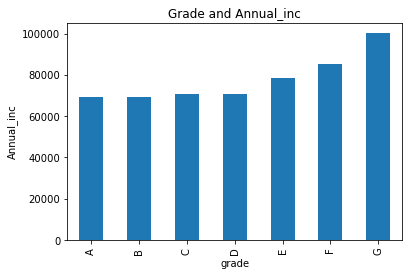

In [25]:
ax5 = loan_df.groupby('grade').agg({'annual_inc':'mean'}).plot.bar(legend = False)
ax5.set_title('Grade and Annual_inc')
ax5.set_ylabel('Annual_inc')
#the higher the income, the larger the loan amount. Hence the increase in the rate depending on the growth of the loan amount

==> The same applies to the borrower's income. Borrowers with higher incomes belong to the latter group. However, in my opinion, this has an indirect impact on the grade. Most likely, borrowers with a higher standard of living also need large amounts of loans.

==> What about the geography of loans. 
Most loans are taken in California, incomes do not vary much by state.

Text(0, 0.5, 'Count of Loan')

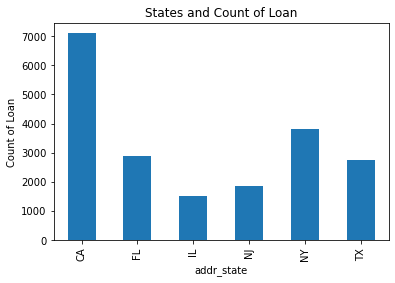

In [55]:
ax6 = loan_df.groupby('addr_state').agg({'loan_amnt':'count'}).plot.bar(legend = False)
ax6.set_title('States and Count of Loan')
ax6.set_ylabel('Count of Loan')
#most loans are taken in California

Text(0.5, 1.0, 'State')

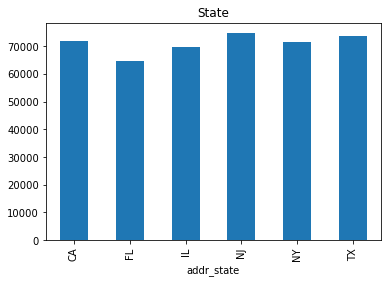

In [29]:
ax6 = loan_df.groupby('addr_state').agg({'annual_inc':'mean'}).plot.bar(legend = False)
ax6.set_title('State')

0.2513029787490761

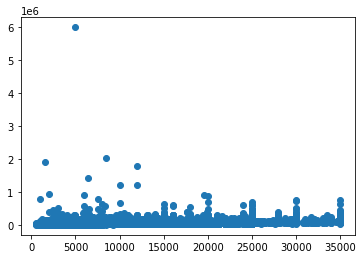

In [53]:
plt.scatter(loan_df['loan_amnt'],loan_df['annual_inc'])
np.corrcoef(loan_df['loan_amnt'],loan_df['annual_inc'])[0,1]

To have an idea of the temporary changes, i transform the column loan_df['issue_d'] to the datetime type.

In [30]:
loan_df['issue_d']

0        Dec-2011
1        Dec-2011
2        Dec-2011
3        Dec-2011
4        Dec-2011
           ...   
19903    Jul-2007
19904    Jul-2007
19905    Jul-2007
19906    Jul-2007
19907    Jul-2007
Name: issue_d, Length: 19908, dtype: object

In [31]:
from datetime import datetime

In [32]:
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'])
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
19903   2007-07-01
19904   2007-07-01
19905   2007-07-01
19906   2007-07-01
19907   2007-07-01
Name: issue_d, Length: 19908, dtype: datetime64[ns]

In [33]:
loan_df['issue_year']=loan_df['issue_d'].dt.year
loan_df['issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
19903    2007
19904    2007
19905    2007
19906    2007
19907    2007
Name: issue_year, Length: 19908, dtype: int64

<AxesSubplot:xlabel='issue_year'>

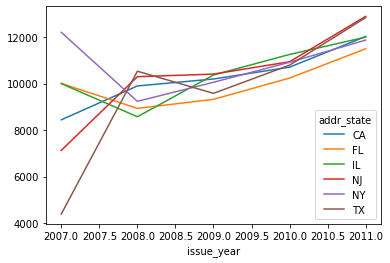

In [34]:
loan_df2=loan_df.pivot_table(values='loan_amnt', index='issue_year',columns='addr_state', aggfunc='mean')
loan_df2.plot.line()

<AxesSubplot:xlabel='issue_year'>

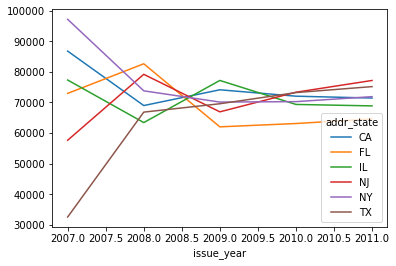

In [35]:
loan_df3=loan_df.pivot_table(values='annual_inc', index='issue_year',columns='addr_state', aggfunc='mean')
loan_df3.plot.line()
#the average loan amount grew faster than the average salary.

<AxesSubplot:xlabel='issue_year'>

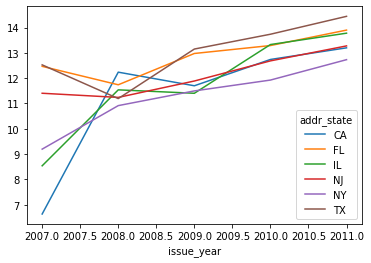

In [36]:
loan_df5=loan_df.pivot_table(values='dti', index='issue_year',columns='addr_state', aggfunc='mean')
loan_df5.plot.line()
#increased the credit burden

<AxesSubplot:xlabel='issue_year'>

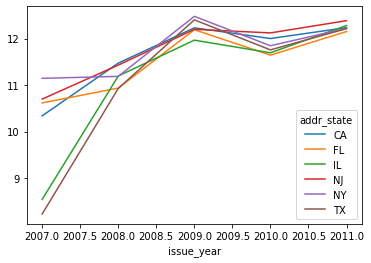

In [37]:
loan_df4=loan_df.pivot_table(values='int_rate', index='issue_year',columns='addr_state', aggfunc='mean')
loan_df4.plot.line()

==> With the increase in the number of loans taken, the need for large amounts of credit also grew, hence the growth in interest rates

==> Since 2006, there has been a rapid growth in lending.
At the same time, wages do not increase as much as the loan amount as a consequence , it increases debt-to-income ratio (DTI). 
A debt-to-income ratio (DTI) is a personal finance measure that compares the amount of debt you have to your overall income. it also increases over the years. 
Thus, the number of borrowers with a high credit load increases.
The increase (DTI) of the population is a general trend in 2010-2011 in the United States, which is associated with the preceding mortgage crisis.

In [121]:
paid_off_rate=loan_df[loan_df['loan_status']=='Fully Paid']['term'].count()/loan_df['loan_status'].count()
paid_off_rate
#calculating the average value of the share of paid loans

0.8521699819168174

Let's see the number of loans paid.
85% of loans have been paid.

In [38]:
pt_term=loan_df.pivot_table(values='int_rate', index='term',columns='loan_status', aggfunc='count')
pt_term

loan_status,Charged Off,Fully Paid
term,,
36 months,1728,13124
60 months,1215,3841


In [39]:
pt_term['payoffRate']=pt_term.apply(lambda row: row['Fully Paid']/(row['Fully Paid']+row['Charged Off']), axis=1)

In [40]:
pt_term['term'] = pt_term.index

In [125]:
pt_term

loan_status,Charged Off,Fully Paid,payoffRate,term
term,,,,
36 months,1728,13124,0.883652,36 months
60 months,1215,3841,0.759691,60 months


In [42]:
from scipy import stats

In [43]:
A = pt_term['Charged Off']
B = pt_term['Fully Paid']
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='two-sided')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1471.5 8482.5
p-value 0.2705290011497496
We fail to reject the null hypothesis


I get a new table using the pivot_table method with the number of credits.

The payoffRate ratio is approximately the same for loan terms.

I would like to check whether the rate affects the repayment of the loan. To do this, I used a t-test for independet samples.

The rate does not affect the repayment of the loan.

In [47]:
mapping_dict = {'36 months':0, '60 months':1}
loan_df['loan_term_year']=loan_df.term.map(mapping_dict)

In [48]:
A = (loan_df[loan_df['loan_status']=='Fully Paid'])['loan_term_year'] #H0: A>B
B =(loan_df[loan_df['loan_status']=='Charged Off'])['loan_term_year'] #H1: A<B
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='less')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

0.22640730916592985 0.41284403669724773
p-value 1.580962223388964e-103
We reject the null hypothesis


In [49]:
A = (loan_df[loan_df['loan_status']=='Fully Paid'])['int_rate'] #H0: A>B
B =(loan_df[loan_df['loan_status']=='Charged Off'])['int_rate'] #H1: A<B
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='less')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

11.788178603006168 13.827940876656601
p-value 1.7596551424145754e-171
We reject the null hypothesis


In [127]:
pt_grade=loan_df.pivot_table(values='int_rate', index='grade',columns='loan_status')
pt_grade['grade'] = pt_grade.index

In [128]:
pt_grade

loan_status,Charged Off,Fully Paid,grade
grade,,,
A,7.609211,7.333804,A
B,11.137728,11.018070,B
C,13.563393,13.553637,C
D,15.835561,15.673412,D
E,17.749153,17.619602,E
F,20.009885,19.596148,F
G,21.611404,21.199216,G


In [130]:
pt_grade_amt=loan_df.pivot_table(values='loan_amnt', index='grade',columns='loan_status', aggfunc='count')
pt_grade_amt['grade'] = pt_grade.index
pt_grade_amt

loan_status,Charged Off,Fully Paid,grade
grade,,,
A,304,4571,A
B,779,5286,B
C,672,3415,C
D,579,2169,D
E,378,1056,E
F,174,366,F
G,57,102,G


In [131]:
pt_grade_amt['payoffRate']=pt_grade_amt.apply(lambda row: row['Fully Paid']/(row['Fully Paid']+row['Charged Off']), axis=1)

In [132]:
pt_grade_amt

loan_status,Charged Off,Fully Paid,grade,payoffRate
grade,,,,
A,304,4571,A,0.937641
B,779,5286,B,0.871558
C,672,3415,C,0.835576
D,579,2169,D,0.789301
E,378,1056,E,0.736402
F,174,366,F,0.677778
G,57,102,G,0.641509


In [133]:
A = (pt_grade_amt.loc[pt_grade_amt['grade'].isin(['A','B','C','D'])])['payoffRate']
B =(pt_grade_amt.loc[pt_grade_amt['grade'].isin(['E','F','G'])])['payoffRate']
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='greater')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

0.8585191683304289 0.6852296284600697
p-value 0.005319495262947573
We reject the null hypothesis


==> However, the hypothesis is confirmed that the loan repayment coefficient is higher in the first three groups. Consequently, in the last 4 groups, loan repayment occurs less frequently

In [47]:
pt_grade_inc=loan_df.pivot_table(values='annual_inc', index='grade',columns='loan_status',aggfunc='mean')
pt_grade_inc['grade'] = pt_grade.index
pt_grade_inc

loan_status,Charged Off,Fully Paid,grade
grade,,,
A,54627.197368,70127.679939,A
B,60440.029525,70437.940219,B
C,60488.662202,72809.666764,C
D,63862.255613,72563.396496,D
E,75638.415344,79777.064394,E
F,83664.160920,85676.207650,F
G,79981.017544,111594.294118,G


In [48]:
A =pt_grade_inc['Charged Off'] #H0: a>b
B = pt_grade_inc['Fully Paid'] #H1: a<b
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='less')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

68385.9626451822 80426.60708291542
p-value 0.056426532072302964
We fail to reject the null hypothesis


==> The hypothesis is also not confirmed that those borrowers who have a lower salary do not pay loans

==> The term of the loan, the rate, salary do not affect the repayment of loans. Given that the average loan amount and the number of loans have been growing strongly in recent years, while wages have been growing much slower, it can be assumed that DTI, which characterizes the credit load, plays a major role in forecasting repayment. After all, the lower the credit burden and the higher the borrower's income, the lower dti and lower dependence on loans. Accordingly, the probability that the loan will be paid is higher.

Let 's test the hypothesis that the lower the coefficient DTI, the higher the probability that the loan will be paid in full

In [148]:
loan_df2= pd.DataFrame(loan_df, columns=['annual_inc', 'loan_amnt', 'loan_status','grade','dti','issue_year']) 
loan_df2

,annual_inc,loan_amnt,loan_status,grade,dti,issue_year
0,12252.0,2400,Fully Paid,C,8.72,2011
1,49200.0,10000,Fully Paid,C,20.00,2011
2,48000.0,3000,Fully Paid,E,5.35,2011
3,40000.0,5600,Charged Off,F,5.55,2011
4,15000.0,5375,Charged Off,B,18.08,2011
...,...,...,...,...,...,...
19903,250000.0,5000,Fully Paid,B,10.00,2007
19904,13500.0,3500,Fully Paid,B,16.44,2007
19905,48000.0,25000,Fully Paid,C,4.05,2007
19906,200000.0,3000,Fully Paid,C,0.00,2007


In [149]:
loan_df2[loan_df2['loan_status']=='Fully Paid']['annual_inc'].mean()

72261.02481579722

In [150]:
loan_df2[loan_df2['loan_status']=='Charged Off']['annual_inc'].mean()

64227.61841658172

<AxesSubplot:>

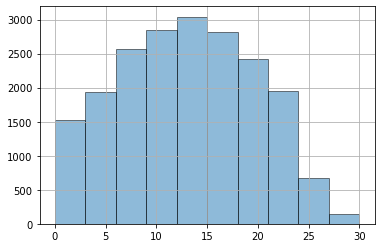

In [52]:
loan_df2.dti.hist(edgecolor='black', alpha=0.5)

In [ ]:
loan_df3=pd.DataFrame(loan_df, columns=['annual_inc', 'loan_amnt', 'loan_status','term']) 
loan_df3

In [ ]:
A = (loan_df2[loan_df2['loan_status']=='Fully Paid'])['dti'] #H0: A>B
B =(loan_df2[loan_df2['loan_status']=='Charged Off'])['dti'] #H1: A<B
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='less')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

In [53]:
loan_df2[loan_df2['loan_status']=='Fully Paid']['dti'].mean()

12.901124668435008

In [54]:
loan_df2[loan_df2['loan_status']=='Charged Off']['dti'].mean()

13.62827047230716

In [55]:
A = (loan_df2[loan_df2['loan_status']=='Fully Paid'])['dti'] #H0: A>B
B =(loan_df2[loan_df2['loan_status']=='Charged Off'])['dti'] #H1: A<B
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='less')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

12.901124668435008 13.62827047230716
p-value 2.294340765203667e-08
We reject the null hypothesis


==> Then, it can be argued that the less dependence on credit funds - the ratio of borrowed funds to own, the better the repayment of the loan

In [143]:
loan_df['revol_util'].fillna(loan_df['revol_util'].mean(),inplace=True)
#Fill missing values in revol_util (Revolving line utilization rate, or the amount) 
#with the mean value of the column in loan_df.

In [144]:
loan_df['pub_rec_bankruptcies'].fillna(0, inplace=True)
#Fill missing values in pub_rec_bankruptcies with 0 (which is the mode of the column) in loan_df.

In [145]:
loan_df['revol_util'].isnull().sum()

0

In [146]:
loan_df['pub_rec_bankruptcies'].isnull().sum()

0

==> Well, it is safe to say that dti has a direct impact on the repayment of loans, other values, such as salary, class, rate, also have an impact on the repayment of loans to one degree or another. Thus, all these variables should be taken into account when building a credit forecasting model.

I explored the relationship between following categorical features and repaid.

In [58]:
loan_df.loan_status.value_counts()

Fully Paid     16965
Charged Off     2943
Name: loan_status, dtype: int64

In [147]:
mapping_dict = {'Charged Off':0, 'Fully Paid':1}
loan_df['repaid'] = loan_df.loan_status.map(mapping_dict)
loan_df.repaid.value_counts()

1    16965
0     2943
Name: repaid, dtype: int64

In [148]:
loan_df.repaid.mean()

0.8521699819168174

In [149]:
mapping_dict = {'36 months':3, '60 months':5}
loan_df['loan_term_year']=loan_df.term.map(mapping_dict)
loan_df.loan_term_year.value_counts()
loan_df.groupby('loan_term_year').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
loan_term_year,,
5,0.759691,5056
3,0.883652,14852


In [150]:
#relationship between purpose and repaid rate
loan_df.groupby('purpose').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
purpose,,
small_business,0.728177,905
educational,0.801242,161
house,0.823864,176
moving,0.829653,317
other,0.843689,2060
debt_consolidation,0.845670,9389
medical,0.854286,350
vacation,0.859296,199
renewable_energy,0.862745,51


In [151]:
#encode purpose to create purpose_code
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_df['purpose_code'] = le.fit_transform(loan_df.purpose)

In [153]:
#relationship between grade and repaid rate, encode grade to create grade_code
loan_df.groupby('grade').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
grade,,
G,0.641509,159
F,0.677778,540
E,0.736402,1434
D,0.789301,2748
C,0.835576,4087
B,0.871558,6065
A,0.937641,4875


In [154]:
le = LabelEncoder()
loan_df['grade_code'] = le.fit_transform(loan_df.grade)

In [155]:
#relationship between home_ownership and repaid rate, encode home_ownership to home_ownership_code
loan_df.groupby('home_ownership').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
home_ownership,,
OTHER,0.818182,44
OWN,0.841527,1546
RENT,0.847620,10966
MORTGAGE,0.861379,7351
NONE,1.000000,1


In [156]:
le = LabelEncoder()
loan_df['home_ownership_code'] = le.fit_transform(loan_df.home_ownership)

In [157]:
#relationship between addr_state and repaid rate, encode addr_state to addr_state_code
loan_df.groupby('addr_state').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
addr_state,,
FL,0.822772,2872
CA,0.840816,7105
NJ,0.847978,1855
NY,0.868745,3817
IL,0.870164,1525
TX,0.882224,2734


In [158]:
le = LabelEncoder()
loan_df['addr_state_code'] = le.fit_transform(loan_df.addr_state)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [160]:
loan_df['pub_rec_bankruptcies'].describe

<bound method NDFrame.describe of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19903    0.0
19904    0.0
19905    0.0
19906    0.0
19907    0.0
Name: pub_rec_bankruptcies, Length: 19908, dtype: float64>

In [173]:
features = ['purpose_code','grade_code','dti','annual_inc', 
            'int_rate','loan_term_year','revol_util','pub_rec_bankruptcies', 'total_pymnt','funded_amnt']
target = 'repaid'

In [174]:
X = loan_df[features]
y =loan_df[target]
X.shape, y.shape

((19908, 10), (19908,))

In [175]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [177]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(19908, 10)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.4, 
                                                    random_state=22)
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}" .format(X_test.shape, y_test.shape))

Train dataset: (11944, 10)(11944,)
Test dataset: (7964, 10)(7964,)


In [197]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.9267955801104972

In [180]:
confusion_matrix(y_test, y_pred)

array([[ 602,  581],
       [   2, 6779]], dtype=int64)

In [181]:
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      1183
           1       0.92      1.00      0.96      6781

    accuracy                           0.93      7964
   macro avg       0.96      0.75      0.82      7964
weighted avg       0.93      0.93      0.92      7964



In [192]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
rep = classification_report(y_test, y_pred)
print(rep)
clf.score(X_test, y_test)

[[ 412  771]
 [ 139 6642]]
              precision    recall  f1-score   support

           0       0.75      0.35      0.48      1183
           1       0.90      0.98      0.94      6781

    accuracy                           0.89      7964
   macro avg       0.82      0.66      0.71      7964
weighted avg       0.87      0.89      0.87      7964



0.8857358111501757

In [193]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
rep = classification_report(y_test, y_pred)
print(rep)
clf.score(X_test, y_test)

[[ 999  184]
 [ 213 6568]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1183
           1       0.97      0.97      0.97      6781

    accuracy                           0.95      7964
   macro avg       0.90      0.91      0.90      7964
weighted avg       0.95      0.95      0.95      7964



0.9501506780512305

In [194]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
rep = classification_report(y_test, y_pred)
print(rep)
clf.score(X_test, y_test)

[[ 849  334]
 [  14 6767]]
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1183
           1       0.95      1.00      0.97      6781

    accuracy                           0.96      7964
   macro avg       0.97      0.86      0.90      7964
weighted avg       0.96      0.96      0.95      7964



0.9563033651431442